<a href="https://colab.research.google.com/github/TechWithEva/Alura_G9_2026_Challenges_and_Tracking/blob/main/Challenge1_Alura'sStores_Eva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge-1_Alura's Store**

Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. **El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.**

Para ello, *se analizaran los datos de las 4 tiendas en términos de volumen de ventas, rendimiento y reseñas.*







## Objetivos de este desafío
### Adicionalmente al Objetivo General planteado se requiere se apliquen conceptos de aprendizaje desarrollados en el curso *Fundamentos de Python y Datos G9 - ONE* que incluyen:
* Cargua y manipulacion de raw data (CSV) con la biblioteca Pandas.
* Crear visualizaciones de datos con la biblioteca Matplotlib.
* Analizar métricas como ingresos, reseñas y rendimiento de ventas.

## Los criterios de aceptación son:
* Análisis de Ingresos por Tienda.
* Análisis de Categorias más vendidas.
* Análisis de Productos más vendidos y envío promedio.
* Análisis de Reseñas de Clientes.
* Visualización de resultados (al menos 3 tipos de gráficos).
* Escribir una recomendación

## Funciones auxiliares


#### Cleansing y otros

In [ ]:
from datetime import datetime
def transformaFecha(base, attr)->datetime:
  return pd.to_datetime(base[attr], format='%d/%m/%Y')

def constructorListas(base, attr)->list:
  return sorted(base[(attr).strip()].unique().tolist())

#### Funciones de Cálculo

In [ ]:
def AgregacionPorAtributo(base, attrAgrupamiento, attrCalculo)->list:
  return base.groupby(attrAgrupamiento)[attrCalculo].sum().round(2).tolist()

def PromedioPorAtributo(base, attrAgrupamiento, attrCalculo)->list:
  return base.groupby(attrAgrupamiento)[attrCalculo].mean().round(2).tolist()

def conteoPorAtributo(base, attrAgrupamiento, Attr)->list:
  return base.groupby(attrAgrupamiento)[Attr].count().tolist()

In [ ]:
import pandas as pd
url1=('https://raw.githubusercontent.com/TechWithEva/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv')
url2=('https://raw.githubusercontent.com/TechWithEva/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv')
url3=('https://raw.githubusercontent.com/TechWithEva/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv')
url4=('https://raw.githubusercontent.com/TechWithEva/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv')

base_t1 = pd.read_csv(url1,sep=',')
base_t2 = pd.read_csv(url2,sep=',')
base_t3 = pd.read_csv(url3,sep=',')
base_t4 = pd.read_csv(url4,sep=',')

display(base_t1.head())
display(base_t2.head())
display(base_t3.head())
display(base_t4.head())

In [ ]:
#Generar un identificador de tienda para integrar los datos en un sólo archivo
base_t1.insert(0,'Tienda', 1)
base_t2.insert(0,'Tienda', 2)
base_t3.insert(0,'Tienda', 3)
base_t4.insert(0,'Tienda', 4)
display(base_t1.head())
display(base_t2.head())
display(base_t3.head())
display(base_t4.head())

## 2. Integración de Datos y Tratamiento

### 2.1 Integración de orígenes de datos

In [ ]:
#verificamos el tamaño en filas y columnas de cada base 2359 con 13 columnas, excepto por la tienda 4 que tiene 2358 filas
#print(base_t1.shape)
#print(base_t2.shape)
#print(base_t3.shape)
#print(base_t4.shape)

#procedemos a integrar los df en una  sola base
frames = [base_t1, base_t2, base_t3, base_t4]
bd_tiendas = pd.concat(frames)
#renombramos algunas columnas
bd_tiendas.rename(columns={'Categoría del Producto': 'ProductoCategoria','Precio': 'TrnVenta','Calificación': 'ProductoCalificacion','Costo de envío':'TrnCostoEnvio','Fecha de Compra':'TrnFecha','Método de pago':'TrnMetodoPago','Cantidad de cuotas':'TrnCuotas','lat':'CiudadLatitud','lon':'CiudadLongitud','Lugar de Compra':'TrnCiudad'}, inplace=True)
#agregamos un identificador de transaccion
bd_tiendas.insert(0, 'TransaccionID', range(1, len(bd_tiendas) + 1))
#verificamos la integración
bd_tiendas.info()
bd_tiendas.describe()

In [ ]:
display(bd_tiendas)

### 2.2 Tratamiento del conjunto de datos

#### 2.2.1 Tratamiento de datos nulos


In [ ]:
nulos=bd_tiendas.isnull().sum().sum() #no hay nulos

#### 2.2.2 Tratamiento de duplicados

In [ ]:
bd_tiendas.drop_duplicates(inplace=True) #no hay duplicados ya que resultan la misma cantidad de filas

#### 2.2.3 Tratamiento de formatos de fechas

In [ ]:
#ya que el atributo es una cadena en el archivo original, nos aseguramos que todos los valores puedan convertirse a datetime para garantizar que todos los campos son fechas válidas
bd_tiendas['TrnFecha'] = transformaFecha(bd_tiendas,'TrnFecha')
#procedemos a derivar una columna para identificar los trimestres de ventas
bd_tiendas.insert(5, 'TrnAnio', bd_tiendas['TrnFecha'].dt.year)
bd_tiendas.insert(6, 'TrnMes', bd_tiendas['TrnFecha'].dt.month)
bd_tiendas.insert(7, 'TrnTrimestre', bd_tiendas['TrnFecha'].dt.quarter)

#### Tratamiento de información incompleta

In [ ]:
#El archivo contiene la información de los años 2020 al 2023, pero el 2023 únicamente tiene informacion para el primer cuarto de año por lo que se va a excluir
bd_tiendas = bd_tiendas[bd_tiendas['TrnAnio'] != 2023]

## 3. Análisis del conjunto de datos

### 3.1 Análisis de Total de Ventas por Tienda

In [ ]:
Ingreso_total_GlobalxTienda = AgregacionPorAtributo(bd_tiendas,'Tienda','TrnVenta') #ventas totales por cada tienda para los años del 2020 al 2022
#

### 3.2 Análisis de Comportamiento de Ventas por Categoría

In [ ]:
Ingreso_total_x_categoria = conteoPorAtributo(bd_tiendas,'Tienda','TransaccionID')

### 3.3 Análisis de %Satisfacción de Clientes por Tienda

In [ ]:
satisfaccion_por_tienda = PromedioPorAtributo(bd_tiendas,'Tienda','ProductoCalificacion')

### 3.4 Análisis de Comportamiento de Ventas por Producto en cada Tienda

### 3.5 Análisis de Comportamiento de Gasto Promedio de Envío por cada Tienda

In [ ]:
gasto_promedio_por_tienda = PromedioPorAtributo(bd_tiendas,'Tienda','TrnCostoEnvio')

### 3.6 Resumen de perspectivas

In [ ]:
resumen_perspectivas_analisis = {'TIENDA': constructorListas(bd_tiendas,'Tienda')
                                ,'INGRESOS_TOTALES': Ingreso_total_GlobalxTienda
                                ,'PROMEDIO_COSTOS_ENVIO': gasto_promedio_por_tienda
                                ,'PROMEDIO_CALIFICACION': satisfaccion_por_tienda
                                }

base_resumen = pd.DataFrame(resumen_perspectivas_analisis)

## 4. Viz por tipo de Análisis

## Resumenes Por Tienda
* ### Ingresos
* ### Satisfacción
* ### Costos de Envío

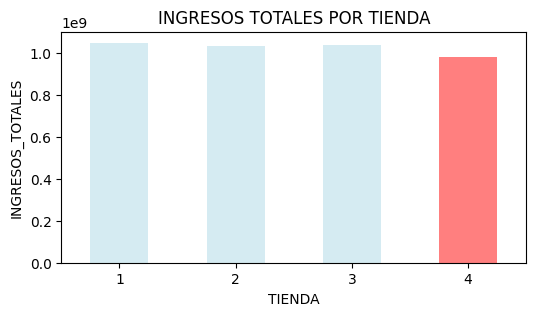

In [185]:
#Datos Globales - Por año - Por Tienda
import matplotlib.pyplot as plt
Ingreso_Promedio_Global = base_resumen['INGRESOS_TOTALES'].mean()

# Lista de colores para identificar la tienda de menores ventas
colorsIngresos = ['red' if val < Ingreso_Promedio_Global else 'lightblue' for val in base_resumen['INGRESOS_TOTALES']]
#display de gráfico de barras
ax1 = base_resumen.plot.bar(x='TIENDA', y='INGRESOS_TOTALES', rot=0, figsize=(6, 3), color=colorsIngresos, alpha=0.5, xlabel='TIENDA', ylabel='INGRESOS_TOTALES', title='INGRESOS TOTALES POR TIENDA', legend=False)

#--------------------------------------------------------------------------------






[Text(0, 0, '3.98'),
 Text(0, 0, '4.04'),
 Text(0, 0, '4.05'),
 Text(0, 0, '3.98')]

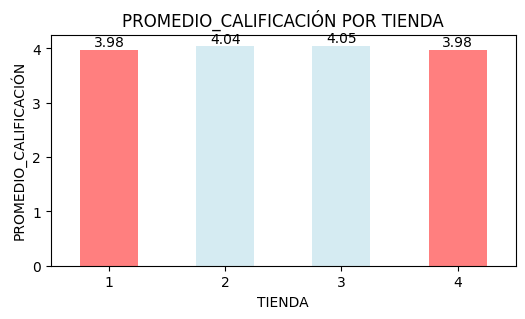

In [184]:
colorsSatisfaccion = ['red' if val < calificacionPromedio else 'lightblue' for val in base_resumen['PROMEDIO_CALIFICACION']]
calificacionPromedio = base_resumen['PROMEDIO_CALIFICACION'].mean()
ax3=base_resumen.plot.bar(x='TIENDA', y='PROMEDIO_CALIFICACION', rot=0, figsize=(6,3), color=colorsSatisfaccion, alpha=0.5, xlabel='TIENDA', ylabel='PROMEDIO_CALIFICACIÓN', title='PROMEDIO_CALIFICACIÓN POR TIENDA',legend=False)
plt.bar_label(ax3.containers[0])

[Text(0, 0, '25762.9'),
 Text(0, 0, '25325.7'),
 Text(0, 0, '25300.8'),
 Text(0, 0, '23754.3')]

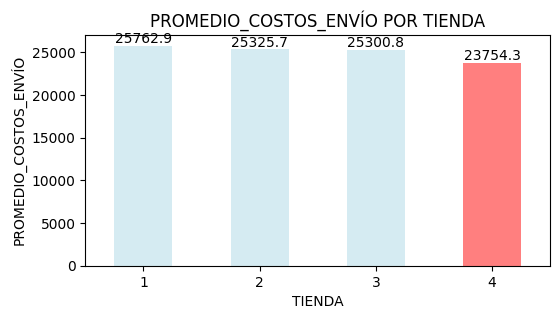

In [183]:
colorsEnvio = ['red' if val < envioPromedio else 'lightblue' for val in base_resumen['PROMEDIO_COSTOS_ENVIO']]
envioPromedio = base_resumen['PROMEDIO_COSTOS_ENVIO'].mean()
ax2=base_resumen.plot.bar(x='TIENDA', y='PROMEDIO_COSTOS_ENVIO', rot=0, figsize=(6,3), color=colorsEnvio, alpha=0.5, xlabel='TIENDA', ylabel='PROMEDIO_COSTOS_ENVÍO', title='PROMEDIO_COSTOS_ENVÍO POR TIENDA',legend=False)
plt.bar_label(ax2.containers[0])


## 5. Resultados del Análisis y Acciones a Tomar